<a href="https://colab.research.google.com/github/mithali8/Recommendation-Sytem-For-Farmers/blob/master/Holt_Exp_Smoothing_carrot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
markets = ['BANGARPET', 'BINNY MILL (F&V)', 'C.R.NAGAR', 'CHICKBALLAPUR', 'DODDABALLAPUR', 'KOLAR', 'MYSURU', 'RAMANAGARA' ]

df = pd.read_csv("/content/drive/My Drive/carrot/carrot_bangarpet.csv")

In [5]:
df.head()

,Unnamed: 0,Market,Date,Grade,Arrivals,Unit,Min,Max,Modal
0,0,BANGARPET,02/01/2019,AVERAGE,4,Quintal,1200.0,1500.0,1300.0
1,1,BANGARPET,03/01/2019,AVERAGE,7,Quintal,1500.0,2000.0,1800.0
2,2,BANGARPET,04/01/2019,AVERAGE,1,Quintal,800.0,1200.0,1000.0
3,3,BANGARPET,05/01/2019,AVERAGE,3,Quintal,1000.0,1500.0,1200.0
4,4,BANGARPET,07/01/2019,AVERAGE,9,Quintal,900.0,1400.0,1100.0


In [6]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


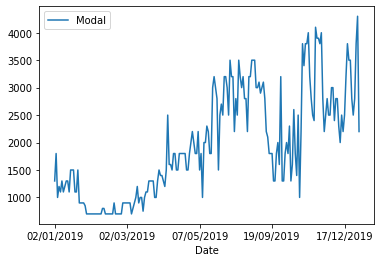

In [8]:
import matplotlib.pyplot as plt
df.plot.line(x = 'Date', 
             y = 'Modal')
plt.show()

In [10]:
data = [df['Date'], df['Modal']]
headers = ['Date', 'Price']
df2 = pd.concat(data, axis=1, keys=headers)
print(df2)

           Date   Price
0    02/01/2019  1300.0
1    03/01/2019  1800.0
2    04/01/2019  1000.0
3    05/01/2019  1200.0
4    07/01/2019  1100.0
..          ...     ...
206  26/12/2019  2500.0
207  27/12/2019  2800.0
208  28/12/2019  3800.0
209  30/12/2019  4300.0
210  31/12/2019  2200.0

[211 rows x 2 columns]


In [14]:
df2.to_csv('/content/drive/My Drive/carrot/trial2.csv', header=True, index=False)

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df3 = pd.read_csv('/content/drive/My Drive/carrot/trial2.csv',index_col='Date',parse_dates=True)
# df3.index.freq = 'D'
# df3.head()
df3.tail()

,Price
Date,
2019-12-26,2500.0
2019-12-27,2800.0
2019-12-28,3800.0
2019-12-30,4300.0
2019-12-31,2200.0


In [35]:
my_avg = sum(df3['Price'])/len(df3['Price'])
print(round(my_avg))
my_avg = round(my_avg)
print(type(my_avg))

1949
<class 'int'>


In [36]:
idx = pd.date_range('2019-02-01', '2019-12-31')
# df3.index = 
df3 = df3.reindex(idx, fill_value = my_avg)
print(df3)

             Price
2019-02-01  1300.0
2019-02-02   700.0
2019-02-03   900.0
2019-02-04  1400.0
2019-02-05  2000.0
...            ...
2019-12-27  2800.0
2019-12-28  3800.0
2019-12-29  1949.0
2019-12-30  4300.0
2019-12-31  2200.0

[334 rows x 1 columns]


In [38]:
df3.index.freq = 'D'
df3.head()

,Price
2019-02-01,1300.0
2019-02-02,700.0
2019-02-03,900.0
2019-02-04,1400.0
2019-02-05,2000.0


In [39]:
train_data = df3.iloc[:300]
test_data = df3.iloc[300:]

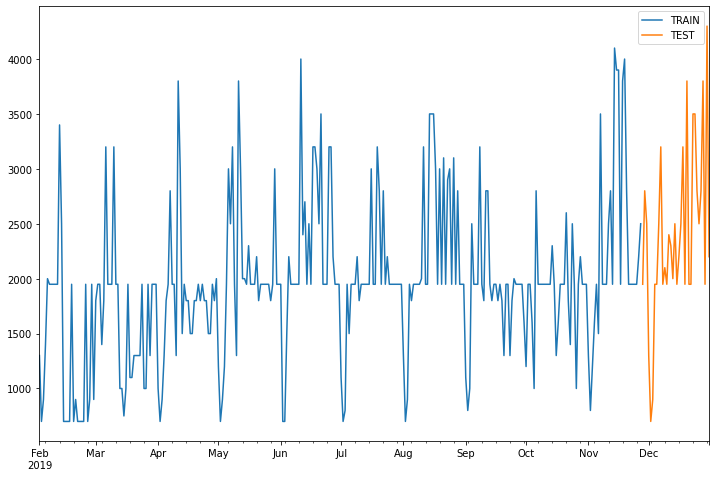

In [40]:
train_data['Price'].plot(legend=True,label='TRAIN')
test_data['Price'].plot(legend=True,label='TEST',figsize=(12,8));

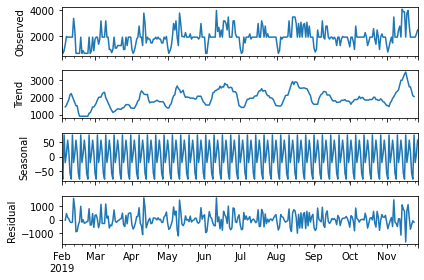

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(train_data['Price']).plot();

In [43]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
span = 12 # The model will consider the last 12 months weighted average for forecasting
alpha = 2/(span+1)
model = SimpleExpSmoothing(train_data['Price']).fit(smoothing_level=alpha)
test_predictions = model.forecast(36).rename('SES Forecast')

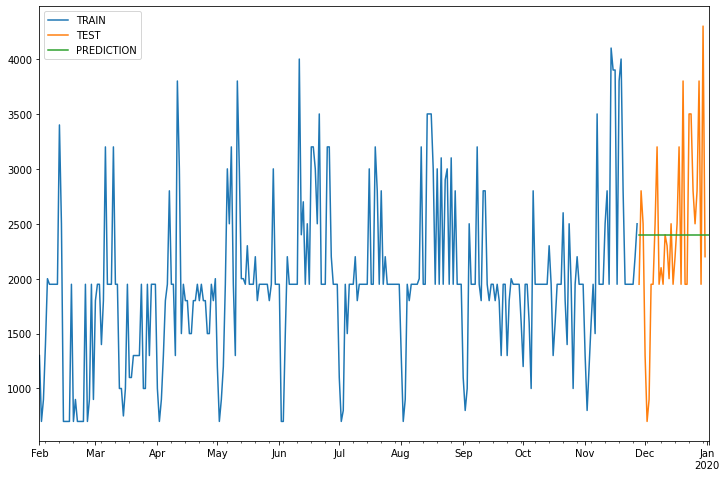

In [44]:
train_data['Price'].plot(legend=True,label='TRAIN')
test_data['Price'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

In [47]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
double_model = ExponentialSmoothing(train_data['Price'],trend='add').fit()
test_predictions = double_model.forecast(36).rename('DES Forecast')

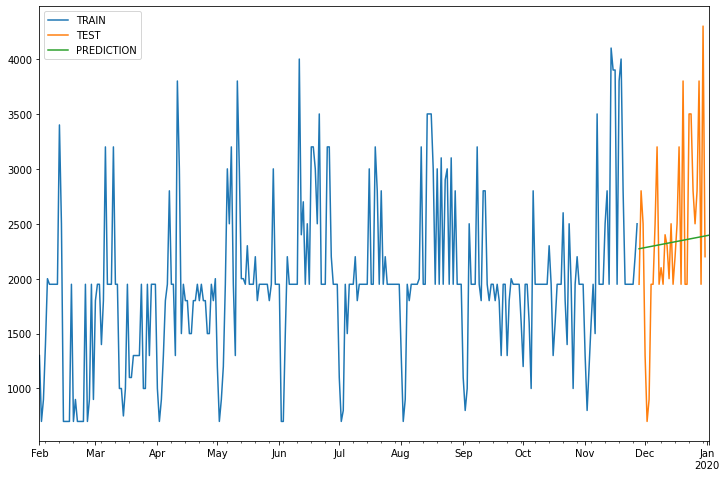

In [48]:
train_data['Price'].plot(legend=True,label='TRAIN')
test_data['Price'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

In [61]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
triple_model = ExponentialSmoothing(train_data['Price'],trend='add',seasonal='add',seasonal_periods=60).fit()
test_predictions = triple_model.forecast(34).rename('TES Forecast')

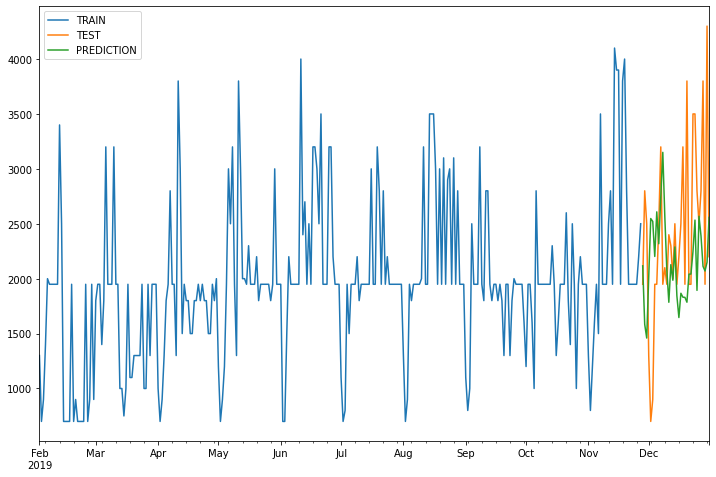

In [62]:
train_data['Price'].plot(legend=True,label='TRAIN')
test_data['Price'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

# Trying Holt's method

In [82]:
data = [df['Date'], df['Modal']]
headers = ['Date', 'Price']
df4 = pd.concat(data, axis=1, keys=headers)
# print(df4)
df4.head()

,Date,Price
0,02/01/2019,1300.0
1,03/01/2019,1800.0
2,04/01/2019,1000.0
3,05/01/2019,1200.0
4,07/01/2019,1100.0


In [83]:
df4.to_csv('/content/drive/My Drive/carrot/trial6.csv', header=True, index=False)

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df5 = pd.read_csv('/content/drive/My Drive/carrot/trial6.csv', index_col='Date',parse_dates=['Date'], dayfirst=True)
# df3 = pd.read_csv('/content/drive/My Drive/carrot/trial2.csv',index_col='Date',parse_dates=True)

In [102]:
df5.head()

,Price
Date,
2019-01-02,1300.0
2019-01-03,1800.0
2019-01-04,1000.0
2019-01-05,1200.0
2019-01-07,1100.0


In [103]:
my_avg = sum(df4['Price'])/len(df4['Price'])
print(round(my_avg))
my_avg = round(my_avg)
print(type(my_avg))

1949
<class 'int'>


In [104]:
idx = pd.date_range('2019-01-02', '2019-12-31')
# df3.index = 
df5 = df5.reindex(idx, fill_value = my_avg)
print(df5)

             Price
2019-01-02  1300.0
2019-01-03  1800.0
2019-01-04  1000.0
2019-01-05  1200.0
2019-01-06  1949.0
...            ...
2019-12-27  2800.0
2019-12-28  3800.0
2019-12-29  1949.0
2019-12-30  4300.0
2019-12-31  2200.0

[364 rows x 1 columns]


In [105]:
df5.reset_index(inplace = True) 

In [106]:
# df5.head()
df5.rename(columns = {'index':'Date'}, inplace = True) 
df5.head()

,Date,Price
0,2019-01-02,1300.0
1,2019-01-03,1800.0
2,2019-01-04,1000.0
3,2019-01-05,1200.0
4,2019-01-06,1949.0


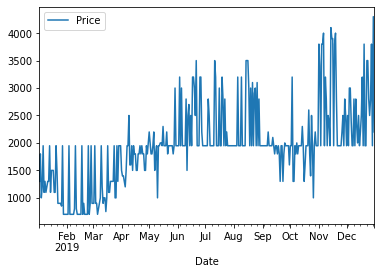

In [107]:
import matplotlib.pyplot as plt
df5.plot.line(x = 'Date', 
             y = 'Price')
plt.show()

In [121]:
df6 = df5
df6 = df6.set_index('Date')
df6.head()

,Price
Date,
2019-01-02,1300.0
2019-01-03,1800.0
2019-01-04,1000.0
2019-01-05,1200.0
2019-01-06,1949.0


In [131]:
df6.index.freq = 'D'

In [132]:

train_data = df6.iloc[:300]
test_data = df6.iloc[300:]

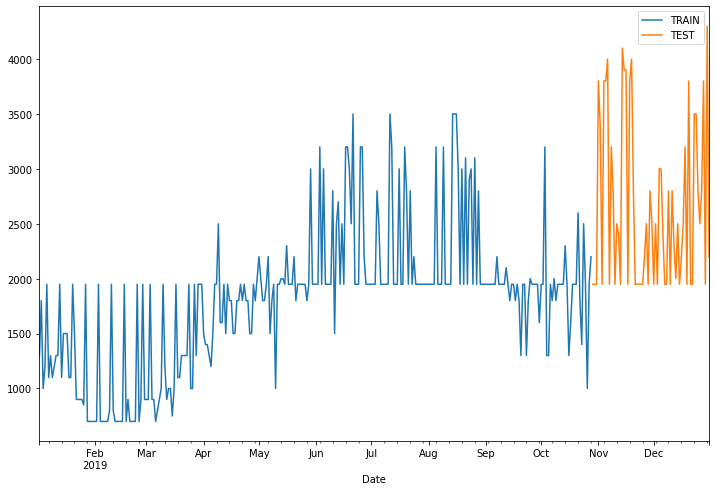

In [133]:
train_data['Price'].plot(legend=True,label='TRAIN')
test_data['Price'].plot(legend=True,label='TEST',figsize=(12,8))
# test_predictions.plot(legend=True,label='PREDICTION');

In [134]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

model = Holt(train_data['Price']).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
test_predictions = model.forecast(34).rename("Holt's linear trend")

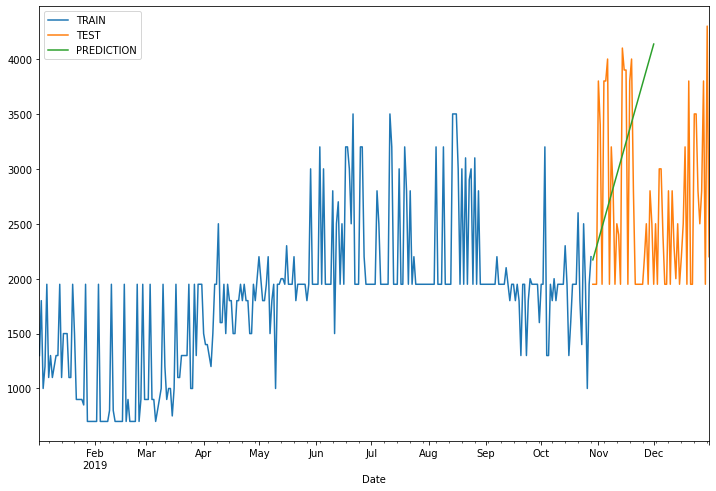

In [135]:
train_data['Price'].plot(legend=True,label='TRAIN')
test_data['Price'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

In [136]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

model = Holt(train_data['Price'], exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
test_predictions = model.forecast(34).rename("Additive damped trend")

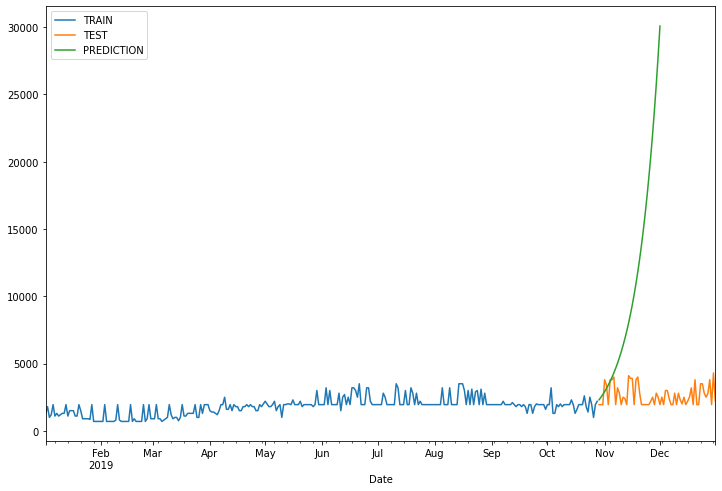

In [137]:
train_data['Price'].plot(legend=True,label='TRAIN')
test_data['Price'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: invalid value encountered in double_scalars
  'initial_slope': b[0] / phi,


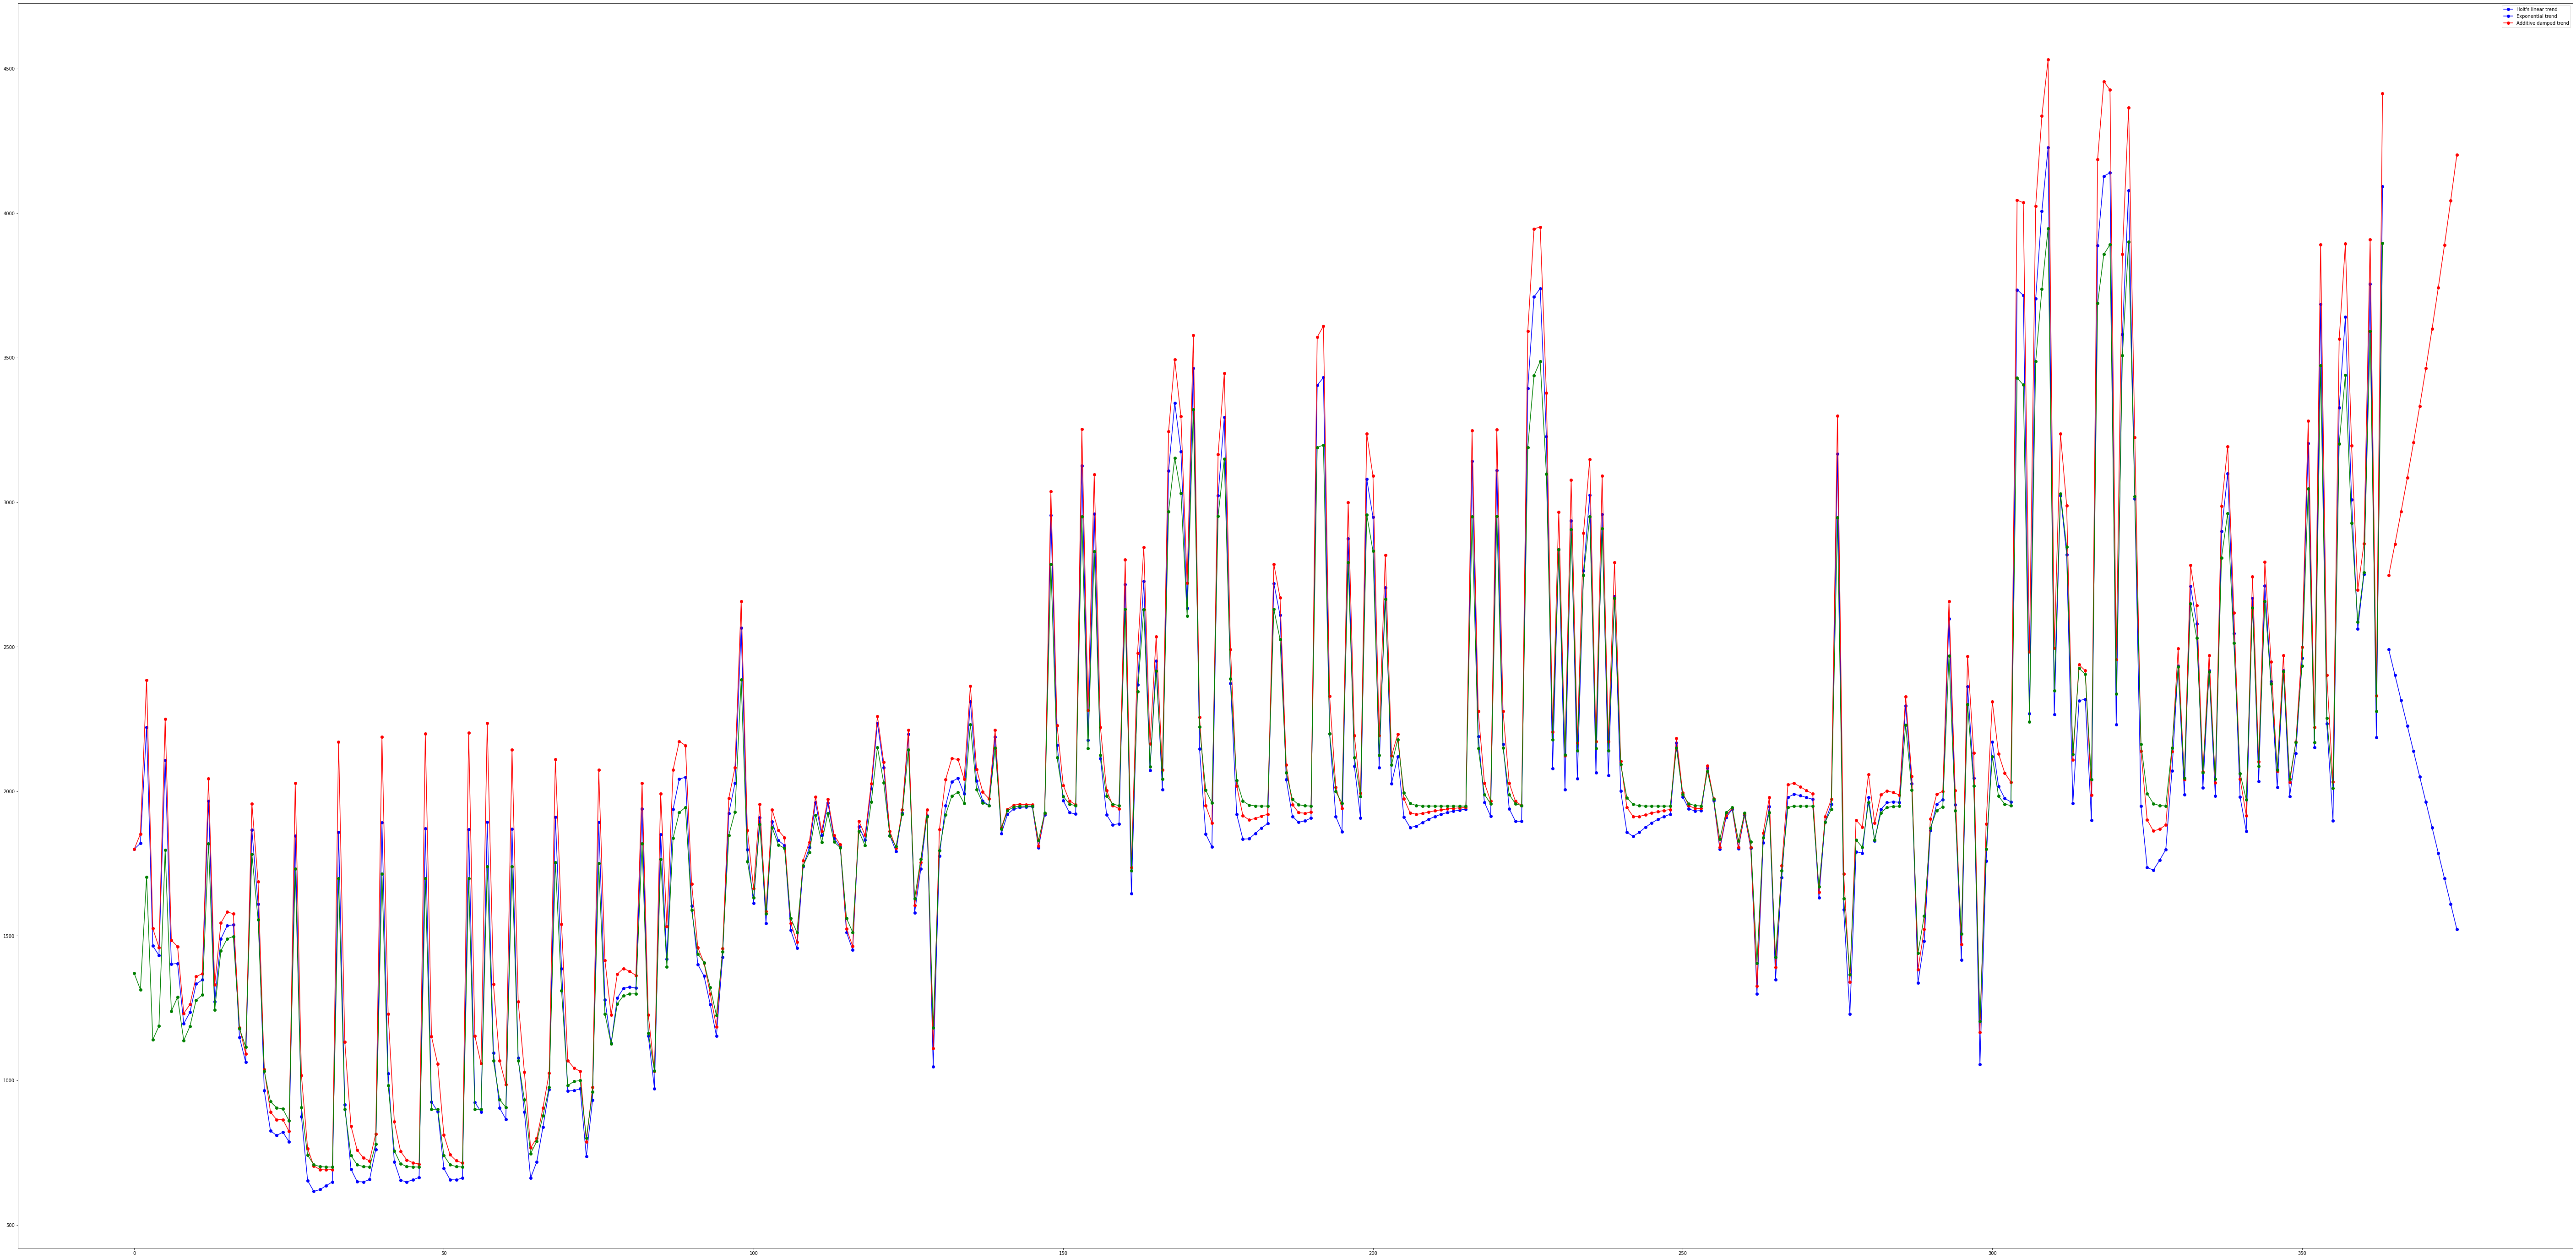

In [113]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
fit1 = Holt(df5['Price']).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast1 = fit1.forecast(12).rename("Holt's linear trend")

fit2 = Holt(df5['Price'], exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast2 = fit2.forecast(12).rename("Exponential trend")

fit3 = Holt(df5['Price'], damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast3 = fit3.forecast(12).rename("Additive damped trend")


fit1.fittedvalues.plot(marker="o", color='blue')
fcast1.plot(color='blue', marker="o", legend=True)
fit2.fittedvalues.plot(marker="o", color='red')
fcast2.plot(color='red', marker="o", legend=True)
fit3.fittedvalues.plot(marker="o", color='green')
fcast3.plot(color='green', marker="o", legend=True)
plt.rcParams["figure.figsize"] = (50,25)
plt.show()
